In [1]:
import pandas as pd
# Allows connections to PostgreSQL
import psycopg2
import sqlalchemy
import matplotlib as plt
from config import password
from matplotlib.ticker import StrMethodFormatter

begin_create_engine = 'postgresql://postgres:'
end_create_engine = '@localhost/EmployeeSQL.db'

# pip install psycopg2 (https://community.cloudera.com/t5/Support-Questions/Superset-No-module-named-psycopg2/td-p/211213)

# make an engine to connect to postgres and then set the connection
from sqlalchemy import create_engine
engine = create_engine(begin_create_engine + password + end_create_engine)
connection = engine.connect()


In [2]:
# Import Employee Table and create pandas dataframe

df_employee = pd.read_sql("SELECT emp_no, emp_title FROM employee", connection)
df_employee.head()

,emp_no,emp_title
0,473302,s0001
1,475053,e0002
2,57444,e0002
3,421786,s0001
4,282238,e0003


In [3]:
#Rename EMP_TITLE to TITLE_ID to match the key we will see later in the Titles table
df_employee.rename(columns={'emp_title':'title_id'}, inplace=True)
df_employee.head()

,emp_no,title_id
0,473302,s0001
1,475053,e0002
2,57444,e0002
3,421786,s0001
4,282238,e0003


In [4]:
# Import Salary Data

df_employee_salary = pd.read_sql("SELECT * FROM salary", connection)
df_employee_salary.head()


,emp_no,salary
0,10001,"$60,117.00"
1,10002,"$65,828.00"
2,10003,"$40,006.00"
3,10004,"$40,054.00"
4,10005,"$78,228.00"


In [5]:
# Select salary, replace string values, cast to float and overrite
df_employee_salary['salary'] = df_employee_salary['salary'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df_employee_salary.head()

,emp_no,salary
0,10001,60117.0
1,10002,65828.0
2,10003,40006.0
3,10004,40054.0
4,10005,78228.0


In [6]:
# Get the data from the employee title file.

df_employee_title = pd.read_sql("SELECT * FROM titles", connection)
df_employee_title.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [7]:
# Join Employee to title to get the employee title
df_employee_with_title = pd.merge(df_employee,df_employee_title,how='inner',on='title_id')
df_employee_with_title.head()

,emp_no,title_id,title
0,473302,s0001,Staff
1,421786,s0001,Staff
2,273487,s0001,Staff
3,246449,s0001,Staff
4,48085,s0001,Staff


In [8]:
# Join now with Salary to get the complete picture of the employee 
df_employee_complete = pd.merge(df_employee_with_title,df_employee_salary,how='inner',on='emp_no')
df_employee_complete.head()

,emp_no,title_id,title,salary
0,473302,s0001,Staff,40000.0
1,421786,s0001,Staff,40000.0
2,273487,s0001,Staff,56087.0
3,246449,s0001,Staff,87084.0
4,48085,s0001,Staff,63016.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B5F191490>]],
      dtype=object)

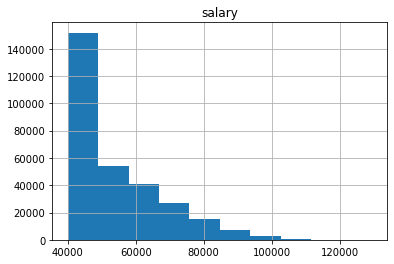

In [9]:
#### BASIC HISTOGRAM

df_employee_complete.hist(column='salary')

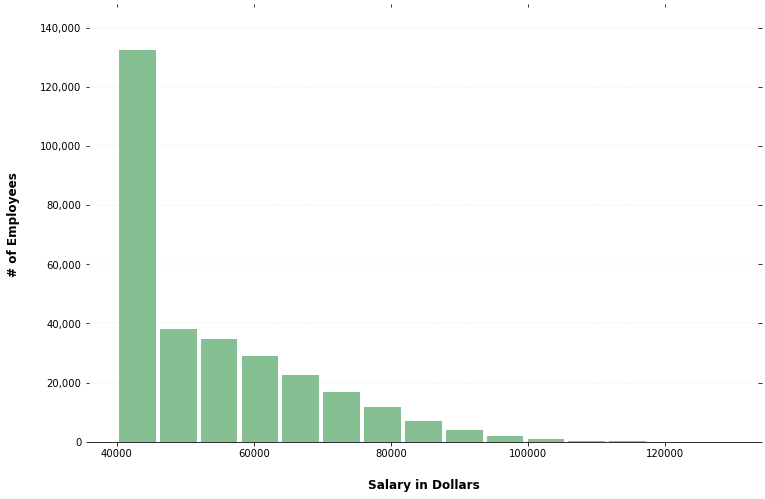

In [10]:
## Create Histogram of Salaries
## https://mode.com/example-gallery/python_histogram/

ax = df_employee_complete.hist(column='salary', bins=15, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Salary in Dollars", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("# of Employees", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [11]:
# Get the average salary by title 

# Group by Title

df_grouped_title = df_employee_complete.groupby(["title"])

# Calculate Average 

title_average_salary = df_grouped_title["salary"].mean()

# Create Title/Average dataframe
df_title_summary = pd.DataFrame({"Average Salary": title_average_salary})


df_title_summary


,Average Salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


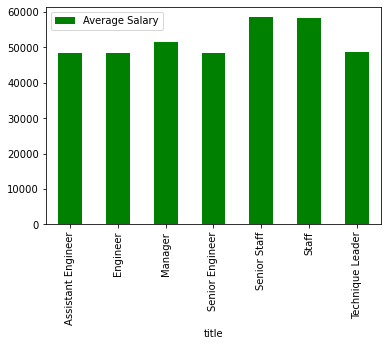

In [12]:
# Generate a bar plot showing the average salary for title using pandas. 

# Plot bar color green

df_title_summary.plot.bar(color="Green")